#alifLam


*   Try - 1:
*   ....



###prepare the colab directory

In [1]:
import shutil, os

folder_to_remove = '/content/sample_data'

try:
  shutil.rmtree(folder_to_remove)
  print(f'folder {folder_to_remove} and its contents has been deleted')
except FileNotFoundError:
  print(f'folder {folder_to_remove}, is not exist')
except PermissionError:
  print(f'permission denied to delete {folder_to_remove}')
except Exception as e:
  print(f'an error has occured {e}')

folder /content/sample_data and its contents has been deleted


### Library

In [2]:
#import library
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import zipfile, os
import gdown

In [3]:
#download the data
# https://drive.google.com/file/d/1dHnOh6MwY1LBQsZx9GK7rO88GhNnfTeK/view?usp=sharing
file_id = '1dHnOh6MwY1LBQsZx9GK7rO88GhNnfTeK'
url = f'https://drive.google.com/uc?id={file_id}'

#download the file
gdown.download(url, 'dataset.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dHnOh6MwY1LBQsZx9GK7rO88GhNnfTeK
To: /content/dataset.zip
100%|██████████| 23.5M/23.5M [00:00<00:00, 29.0MB/s]


'dataset.zip'

In [4]:
#extract the data
zip_target = '/content/dataset.zip'

extracting = zipfile.ZipFile(zip_target, 'r')
extracting.extractall()
extracting.close()

In [5]:
#remove the __MACOSX

folder_to_remove = '/content/__MACOSX'

try:
  shutil.rmtree(folder_to_remove)
  print(f'folder {folder_to_remove} and its contents has been deleted')
except FileNotFoundError:
  print(f'folder {folder_to_remove}, is not exist')
except PermissionError:
  print(f'permission denied to delete {folder_to_remove}')
except Exception as e:
  print(f'an error has occured {e}')

folder /content/__MACOSX and its contents has been deleted


In [6]:
os.listdir('/content/dataset')

['Train+Test Images Matlab.mat',
 'Test Images 3360x32x32',
 'Train Images 13440x32x32',
 'csvTestImages 3360x1024.csv',
 'csvTrainLabel 13440x1.csv',
 'csvTestLabel 3360x1.csv',
 'Arabic Handwritten Characters Dataset CSV',
 'csvTrainImages 13440x1024.csv']

In [7]:
# csvTrainImages 13440x1024.csv
#read data
path = '/content/dataset'

train_data_x = pd.read_csv(path + '/csvTrainImages 13440x1024.csv', header=None)
train_data_y = pd.read_csv(path + '/csvTrainLabel 13440x1.csv', header=None)
test_data_x = pd.read_csv(path + '/csvTestImages 3360x1024.csv', header=None)
test_data_y = pd.read_csv(path + '/csvTestLabel 3360x1.csv', header=None)

In [8]:
#examine data
#23 classes -> 28 huruf Hijaiyah tanpa hamzah
print('We have  %d training images each contains %d pixels.' %(train_data_x.shape[0], train_data_x.shape[1]))
print('We have  %d training labels each contains %d classes.' %(train_data_y.shape[0], len(train_data_y.value_counts())))
print('We have  %d testing images each contains %d pixels.' %(test_data_x.shape[0], test_data_x.shape[1]))
print('We have  %d testing labels each contains %d classes.' %(test_data_y.shape[0], len(test_data_y.value_counts())))

We have  13440 training images each contains 1024 pixels.
We have  13440 training labels each contains 28 classes.
We have  3360 testing images each contains 1024 pixels.
We have  3360 testing labels each contains 28 classes.


In [9]:
#check total label per character
train_data_y.value_counts()

1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
21    480
22    480
23    480
24    480
25    480
26    480
27    480
28    480
Name: count, dtype: int64

In [10]:
arabic_chars = {1: 'alif',
                2: 'ba',
                3: 'ta',
                4: 'tsa',
                5: 'jim',
                6: 'hâ',
                7: 'khâ',
                8: 'dal',
                9: 'dzal',
                10: 'ra',
                11: 'zai',
                12: 'sîn',
                13: 'syîn',
                14: 'shâd',
                15: 'dhâd',
                16: 'thâ',
                17: 'zhâ',
                18: 'âin',
                19: 'ghain',
                20: 'fa',
                21: 'qâf',
                22: 'kâf',
                23: 'lam',
                24: 'mîm',
                25: 'nun',
                26: 'Ha',
                27: 'waw',
                28: 'yâ'
               }

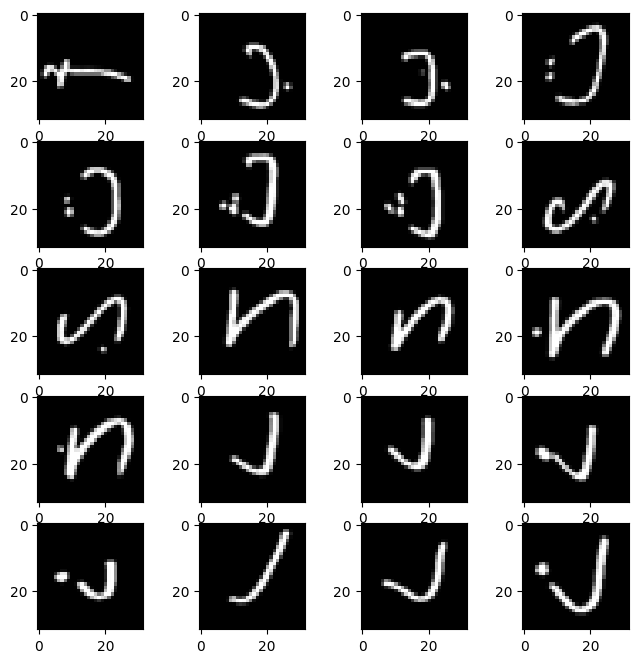

In [11]:
#visualization
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows + 1):
  img = test_data_x.iloc[i].to_numpy().reshape((32, 32))
  fig.add_subplot(rows, columns, i)
  plt.imshow(img, cmap='gray')

plt.show()

In [12]:
#preprocessing

def preprocess_data(train_data_x):
  train_data_x = train_data_x.to_numpy().reshape((train_data_x.shape[0], 32, 32)).astype('uint8')
  for i in range(len(train_data_x)):
    train_data_x[i] = cv2.rotate(train_data_x[i], cv2.ROTATE_90_CLOCKWISE)
    train_data_x[i] = np.flip(train_data_x[i], 1)
  train_data_x = train_data_x.reshape([-1, 32, 32, 1]).astype('uint8')
  train_data_x = train_data_x.astype('float32')/255

  return np.asanyarray(train_data_x)

In [13]:
train_x = preprocess_data(train_data_x)

test_x = preprocess_data(test_data_x)

In [14]:
#process the label
train_y = to_categorical(train_data_y.values.astype('int32') - 1,
                         num_classes=28)

test_y = to_categorical(test_data_y.values.astype('int32') - 1,
                        num_classes=28)

In [15]:
#shuffle our train and test data

%%capture
from sklearn.utils import shuffle

train_x, train_y = shuffle(train_x, train_y)
test_x, test_y = shuffle(test_x, test_y)

In [16]:
#build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense, Flatten

def create_model(activation='relu', optimizer='adam', kernel_initializer='he_normal'):

  model = Sequential()

  model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,1), activation=activation, kernel_initializer=kernel_initializer))
  model.add(MaxPooling2D(2,2))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3,3), padding='same', activation= activation, kernel_initializer=kernel_initializer))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(32, activation= activation, kernel_initializer=kernel_initializer, kernel_regularizer='l2'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Dense(28, activation='softmax'))

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [17]:
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                        

In [18]:
#tunning
seed = 7                                                                        # Select a fixed seed
np.random.seed(seed)                                                            # Specifing the seed for our random generator

optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']                             # Available optimizers
kernel_initializer = ['normal', 'uniform']                                      # Available initializing methods
activation = ['relu', 'linear', 'tanh']                                         # Available activation functions

param_grid = dict(optimizer=optimizer,                                          # Creating the grid
                  kernel_initializer=kernel_initializer,
                  activation=activation)

parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x])
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


we gonna try to catch 24 combinations of parameters 🤡

In [19]:
epochs = 5                                                                      # Specifing the number of epochs for each combination
batch_size = 64                                                                 # Setting the batch size

# Here we will create our different models and run them for 5 epochs each.
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(optimizer=a, kernel_initializer=b, activation=c)
    curr_model.fit(train_x, train_y,
                    validation_split=0.3,
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
147/147 [==============================] - 8s 9ms/step - loss: 3.5057 - accuracy: 0.3451 - val_loss: 4.7724 - val_accuracy: 0.0387
Epoch 2/5
147/147 [==============================] - 1s 9ms/step - loss: 1.7081 - accuracy: 0.6926 - val_loss: 4.5604 - val_accuracy: 0.0345
Epoch 3/5
147/147 [==============================] - 2s 12ms/step - loss: 0.9846 - accuracy: 0.8199 - val_loss: 4.3245 - val_accuracy: 0.0360
Epoch 4/5
147/147 [==============================] - 2s 11ms/step - loss: 0.6591 - accuracy: 0.8793 - val_loss: 1.8303 - val_accuracy: 0.4762
Epoch 5/5
147/147 [==============================] - 2s 11ms/step - loss: 0.4948 - accuracy: 0.9111 - val_loss: 0.6717 - val_accuracy: 0.8755
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
147/147 [==============================] - 3s 9ms/step - loss: 2.5265 - accuracy: 0.4260 - val_loss: 4.9857 - val_accuracy:

After looping through all the combinations it was found that the best combination is:

[Adam, Uniform Initialization, Relu Activation]

Then lets use them to build our final model.

In [20]:
#using the best parameters configuration
#[Adam, Uniform Initialization, Relu Activation ]
model = create_model(optimizer='adam',
                     kernel_initializer='uniform',
                     activation='relu')

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1,
                               save_best_only=True)
history = model.fit(train_x,
                    train_y,
                    validation_split= 0.3,                                      # The model will split the data into 30% of validation.
                    epochs=30,                                                  # We will run the model for 30 epochs
                    batch_size=64,                                              # We will have a batch size of 64
                    callbacks=[checkpointer])                                   # Finally we will use the imported callback

Epoch 1/30
144/147 [============================>.] - ETA: 0s - loss: 2.7963 - accuracy: 0.3480
Epoch 1: val_loss improved from inf to 5.61111, saving model to weights.hdf5
147/147 [==============================] - 4s 10ms/step - loss: 2.7770 - accuracy: 0.3531 - val_loss: 5.6111 - val_accuracy: 0.0345
Epoch 2/30
 18/147 [==>...........................] - ETA: 0s - loss: 1.8080 - accuracy: 0.6311

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


144/147 [============================>.] - ETA: 0s - loss: 1.4398 - accuracy: 0.7206
Epoch 2: val_loss did not improve from 5.61111
147/147 [==============================] - 1s 7ms/step - loss: 1.4322 - accuracy: 0.7219 - val_loss: 5.9794 - val_accuracy: 0.0345
Epoch 3/30
144/147 [============================>.] - ETA: 0s - loss: 0.8660 - accuracy: 0.8458
Epoch 3: val_loss did not improve from 5.61111
147/147 [==============================] - 1s 7ms/step - loss: 0.8639 - accuracy: 0.8459 - val_loss: 6.2607 - val_accuracy: 0.0345
Epoch 4/30
142/147 [===========================>..] - ETA: 0s - loss: 0.6187 - accuracy: 0.8877
Epoch 4: val_loss improved from 5.61111 to 1.85111, saving model to weights.hdf5
147/147 [==============================] - 1s 8ms/step - loss: 0.6172 - accuracy: 0.8881 - val_loss: 1.8511 - val_accuracy: 0.4539
Epoch 5/30
140/147 [===========================>..] - ETA: 0s - loss: 0.4784 - accuracy: 0.9131
Epoch 5: val_loss improved from 1.85111 to 0.99311, saving 

In [22]:
#load the best epoch's weights and then evaluate our model using the test set.
model.load_weights('weights.hdf5')                                              # Loading the best weights
model.evaluate(test_x, test_y)                                                  # Evaluating our model

105/105 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.9482


[0.2843134105205536, 0.9482142925262451]

Text(0.5, 1.0, 'Training and validation loss')

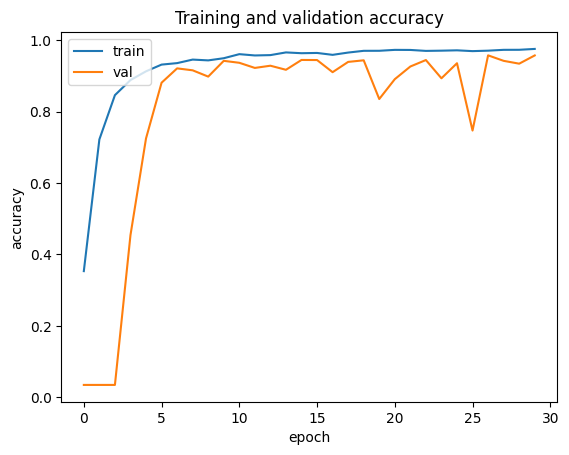

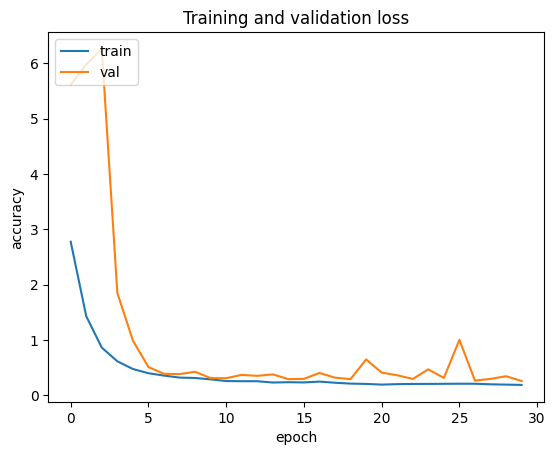

In [23]:
#plot model training journy to check the performance and verify that the model is not overfitting
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.title('Training and validation loss')

In [24]:
#save the model
model.save('my_model.h5')

TESTING THE MODEL

In [47]:
model = tf.keras.models.load_model('my_model.h5')

Saving tes29.png to tes29 (1).png
1/1 [==============================] - 0s 110ms/step
Predicted label: yâ


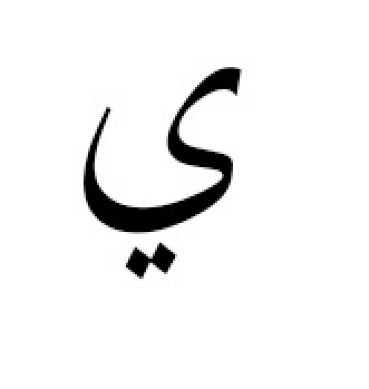

In [80]:
from google.colab import files

def predict_image(image, model_path, arabic_chars):
    model = tf.keras.models.load_model(model_path)

    # Preprocess the image
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.bitwise_not(img)  # Invert colors
    img = cv2.resize(img, (32, 32))
    img = img.reshape(-1, 32, 32, 1)
    img = img.astype('float32') / 255.0

    # Predict the character
    pred = model.predict(img)
    predicted_label = arabic_chars[np.argmax(pred)+1]

    return predicted_label

def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Example usage
def upload_and_predict(model_path, arabic_chars):
    # Upload the file
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Read the uploaded image
        image = cv2.imread(fn)

        # Predict the character
        predicted_label = predict_image(image, model_path, arabic_chars)
        print("Predicted label:", predicted_label)

        # Plot the uploaded image
        plot_image(image)

# Example usage
model_path = "my_model.h5"
arabic_chars = {
    1: 'alif', 2: 'ba', 3: 'ta', 4: 'tsa', 5: 'jim', 6: 'hâ', 7: 'khâ', 8: 'dal', 9: 'dzal',
    10: 'ra', 11: 'zai', 12: 'sîn', 13: 'syîn', 14: 'shâd', 15: 'dhâd', 16: 'thâ', 17: 'zhâ',
    18: 'âin', 19: 'ghain', 20: 'fa', 21: 'qâf', 22: 'kâf', 23: 'lam', 24: 'mîm', 25: 'nun',
    26: 'Ha', 27: 'waw', 28: 'yâ'
}

upload_and_predict(model_path, arabic_chars)
